In [26]:
from math import pow

Function to Calculate the mean value


In [1]:
def cal_mean(readings):
    total = sum(readings)
    number = len(readings)
    mean = total/number
    return mean

Formula for calculating the variance value
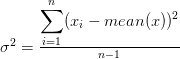


In [30]:
def cal_var(readings):
    mean = cal_mean(readings)
    # mean difference squared readings
    mean_difference_squared_readings = [pow((reading-mean),2) for reading in readings]
    variance = sum(mean_difference_squared_readings)/float(len(readings)-1)
    return variance

Formula for calculating covariance between two series of readings


In [32]:
def cal_covariance(readings_1, readings_2):
    """
    Calculate the covariance between two different list of readings
    :param readings_1:
    :param readings_2:
    :return:
    """
    readings_1_mean = cal_mean(readings_1)
    readings_2_mean = cal_mean(readings_2)
    readings_size = len(readings_1)
    covariance = 0.0
    for i in range(0, readings_size):
        covariance += (readings_1[i] - readings_1_mean) * (readings_2[i] - readings_2_mean)
    return covariance / float(readings_size - 1)

Formula for calculating the {w}_{0} and {w}_{1} values



In [5]:
def cal_simple_linear_regression_coefficients(x_readings, y_readings):
    """
    Calculating the simple linear regression coefficients (B0, B1)
    :param x_readings:
    :param y_readings:
    :return:
    """
    # Coefficient W1 = covariance of x_readings and y_readings divided by variance of x_readings
    # Directly calling the implemented covariance and the variance functions
    # To calculate the coefficient W1
    w1 = cal_covariance(x_readings, y_readings) / float(cal_variance(x_readings))

    # Coefficient W0 = mean of y_readings - ( W1 * the mean of the x_readings )
    w0 = cal_mean(y_readings) - (w1 * cal_mean(x_readings))
    return w0, w1

In [11]:
import pandas as pd
data = pd.read_csv('dataset/input_data.csv')
data.head()

square_feet  price
0          150   6450
1          200   7450
2          250   8450
3          300   9450
4          350  11450

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
square_feet    7 non-null int64
price          7 non-null int64
dtypes: int64(2)
memory usage: 192.0 bytes


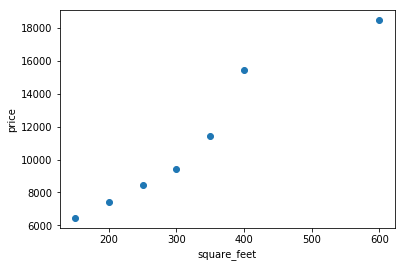

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x = data['square_feet'], y = data['price'])
plt.xlabel('square_feet')
plt.ylabel('price')
plt.show()

In [37]:
#Now let’s use the house price dataset to model the simple linear regression.

def simple_linear_reg(dataset):
    # Get the dataset header names
    X = dataset.iloc[:,0]
    Y = dataset.iloc[:,1]
    m = len(X)
    # to calculate parameters we need mean, variance, covariance
    # calculate mean from mean function
    square_feet_mean = cal_mean(X)
    price_mean = cal_mean(Y)
    # calcualet variance of X
    square_feet_variance = cal_var(X)
    price_variance = cal_var(Y)
    covariance_of_price_and_square_feet = cal_covariance(X,Y)
    w1 = covariance_of_price_and_square_feet / float(square_feet_variance)
    w0 = price_mean - w1 * square_feet_mean
    # prediction
    dataset['predicted price'] = w0 + w1 * X
    return dataset['predicted price']
    

In [39]:
data.head()

square_feet  price  predicted price
0          150   6450      6088.297872
1          200   7450      7527.127660
2          250   8450      8965.957447
3          300   9450     10404.787234
4          350  11450     11843.617021

In [45]:
# calculate rmse
def rmse(target, predicted):
    error_total = 0.0
    for i in range(0,len(predicted)):
        error = pow((predicted[i]-target[i]),2)
        cost = 0.5*(error/len(target))
        error_total+=cost
    return error_total

In [46]:
cost = rmse(data['price'],data['predicted price'])
cost

465235.5623100303

this is an implementation of simple linear regression without running gradient descent algorithm 
 that is why cost is high


In [ ]:
#Check out the complete code below.
#!/usr/bin/env python
# Author : Vernika
# Date: 14-12-2018
# About: Run simple linear regression without using scikit learn

# Required Python Packages
import pandas as pd
from math import pow


def get_headers(dataframe):
    """
    Get the headers name of the dataframe
    :param dataframe:
    :return:
    """
    return dataframe.columns.values


def cal_mean(readings):
    """
    Function to calculate the mean value of the input readings
    :param readings:
    :return:
    """
    readings_total = sum(readings)
    number_of_readings = len(readings)
    mean = readings_total / float(number_of_readings)
    return mean


def cal_variance(readings):
    """
    Calculating the variance of the readings
    :param readings:
    :return:
    """

    # To calculate the variance we need the mean value
    # Calculating the mean value from the cal_mean function
    readings_mean = cal_mean(readings)
    # mean difference squared readings
    mean_difference_squared_readings = [pow((reading - readings_mean), 2) for reading in readings]
    variance = sum(mean_difference_squared_readings)
    return variance / float(len(readings) - 1)


def cal_covariance(readings_1, readings_2):
    """
    Calculate the covariance between two different list of readings
    :param readings_1:
    :param readings_2:
    :return:
    """
    readings_1_mean = cal_mean(readings_1)
    readings_2_mean = cal_mean(readings_2)
    readings_size = len(readings_1)
    covariance = 0.0
    for i in xrange(0, readings_size):
        covariance += (readings_1[i] - readings_1_mean) * (readings_2[i] - readings_2_mean)
    return covariance / float(readings_size - 1)


def cal_simple_linear_regression_coefficients(x_readings, y_readings):
    """
    Calculating the simple linear regression coefficients (B0, B1)
    :param x_readings:
    :param y_readings:
    :return:
    """
    # Coefficient B1 = covariance of x_readings and y_readings divided by variance of x_readings
    # Directly calling the implemented covariance and the variance functions
    # To calculate the coefficient B1
    b1 = cal_covariance(x_readings, y_readings) / float(cal_variance(x_readings))

    # Coefficient B0 = mean of y_readings - ( B1 * the mean of the x_readings )
    b0 = cal_mean(y_readings) - (b1 * cal_mean(x_readings))
    return b0, b1


def predict_target_value(x, b0, b1):
    """
    Calculating the target (y) value using the input x and the coefficients b0, b1
    :param x:
    :param b0:
    :param b1:
    :return:
    """
    return b0 + b1 * x


def cal_rmse(actual_readings, predicted_readings):
    """
    Calculating the root mean square error
    :param actual_readings:
    :param predicted_readings:
    :return:
    """
    square_error_total = 0.0
    total_readings = len(actual_readings)
    for i in xrange(0, total_readings):
        error = predicted_readings[i] - actual_readings[i]
        square_error_total += pow(error, 2)
    rmse = square_error_total / float(total_readings)
    return rmse


def simple_linear_regression(dataset):
    """
    Implementing simple linear regression without using any python library
    :param dataset:
    :return:
    """

    # Get the dataset header names
    dataset_headers = get_headers(dataset)
    print ("Dataset Headers :: ", dataset_headers)

    # Calculating the mean of the square feet and the price readings
    square_feet_mean = cal_mean(dataset[dataset_headers[0]])
    price_mean = cal_mean(dataset[dataset_headers[1]])

    square_feet_variance = cal_variance(dataset[dataset_headers[0]])
    price_variance = cal_variance(dataset[dataset_headers[1]])

    # Calculating the regression
    covariance_of_price_and_square_feet = dataset.cov()[dataset_headers[0]][dataset_headers[1]]
    w1 = covariance_of_price_and_square_feet / float(square_feet_variance)

    w0 = price_mean - (w1 * square_feet_mean)

    # Predictions
    dataset['Predicted_Price'] = w0 + w1 * dataset[dataset_headers[0]]


if __name__ == "__main__":

#     input_path = '/Dataset/input_data.csv'
    house_price_dataset = pd.read_csv('Dataset/input_data.csv')
    simple_linear_regression(house_price_dataset)